<a href="https://colab.research.google.com/github/emmynuel/Udacity-Alx_Data_Analysis_Project/blob/main/ALX_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigate a Dataset - [Tmdb_Movie_Data]

## Table of Contents
<ul>
    <li>Introduction</li>
    <li>Data Wrangling</li>
    <li>Exploratory Data Analysis</li>
    <li>Visualization & Conclusions</li>
</ul>

### Introduction

### Dataset Desciption

Tmdb_movie_dataset contains information about 10,000 movies collected from the movie database, includeing user rating and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Questions 

1. Is a movie genre determinant on revenue generation? 
2. Over the years, which genre is the most popular?
3. Which director have the most rated movie and does it have any link with question 2?
4. Does high popularity means high revenue?
5. Does high budget gives high popularity and revenue?
6. Which release year gives the highest return on movie production?

In [ ]:
#Import the necessary libriries

import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

#Load the data
df = pd.read_csv('./Database_TMDb_movie_data/tmdb-movies.csv', index_col = 'id')
df.head(5)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

### Data Cleaning

Taking a look at the dataframe information above, there are some columns that have null roles. I will drop the columns with null values as i won't be needing them, except the genres columns which i will only be working with the value rolls.

In [ ]:
del_cols = ['homepage','tagline','keywords']
df = df.drop(columns = del_cols)
df = df[df['genres'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 135397 to 22293
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10835 non-null  object 
 1   popularity            10843 non-null  float64
 2   budget                10843 non-null  int64  
 3   revenue               10843 non-null  int64  
 4   original_title        10843 non-null  object 
 5   cast                  10768 non-null  object 
 6   director              10801 non-null  object 
 7   overview              10840 non-null  object 
 8   runtime               10843 non-null  int64  
 9   genres                10843 non-null  object 
 10  production_companies  9827 non-null   object 
 11  release_date          10843 non-null  object 
 12  vote_count            10843 non-null  int64  
 13  vote_average          10843 non-null  float64
 14  release_year          10843 non-null  int64  
 15  budget_adj    

In [ ]:
df['genres'].nunique()

2039

### Data Wrangling

Before going into the analysis, the dataframe is being sorted in a descending order using revenue for us to be able to answer the first question.

In [ ]:
df = df.sort_values('revenue', ascending = False)
df.head(5)

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,
19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [ ]:
df['genres'].nunique()

2039

### Data Cleaning Cont

The genres column is an object(str) type which contain of different value serperated with pipe (|), this value sometimes are the same thing but differently arranged and due to its being string, the drop_duplicate won't work.

Therefore new column named genre1 is created by spliting the genre column, rearrange the value and save as tuple.

Hint: I would have love to create different column for each value but this will throw a bigger problem because the genre column isn't the same number of value.

In [ ]:
df['genre1'] = df['genres'].apply(lambda x:  x.split('|'))


In [ ]:
df.head(5)

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1
id,,,,,,,,,,,,,,,,,,
19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,"[Action, Adventure, Fantasy, Science Fiction]"
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,"[Action, Adventure, Science Fiction, Fantasy]"
597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,"[Drama, Romance, Thriller]"
24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09,"[Science Fiction, Action, Adventure]"
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"[Action, Adventure, Science Fiction, Thriller]"


In [ ]:
df['genre1'] = df.genre1.apply(sorted).transform(tuple)


In [ ]:
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1
id,,,,,,,,,,,,,,,,,,
19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,"(Action, Adventure, Fantasy, Science Fiction)"
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,"(Action, Adventure, Fantasy, Science Fiction)"
597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,"(Drama, Romance, Thriller)"
24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09,"(Action, Adventure, Science Fiction)"
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"(Action, Adventure, Science Fiction, Thriller)"


### Question 1

##### Is a movie genre determinant on revenue generation?

### Outcome

To answer this question, I filter out the top 500 highest revenue generated movies to answer this question.

In this top 500 highest revenue generated movies category, the (Action, Adventure, Science Fiction) genre movies is the most common genre in this space and due to that it's holds highest revenue generated genre.

Their population in this category gives them the top revenue postion but looking at the rest of the data, producing a movie in this genre does not guarantee a high revenue. In calculating revenue per movie, the (Action, Adventure, Science Fiction) genre is not among the top 10 genre. (Drama, Romance, Thriller)	genre is the top genre that gives the higest revenue per movie.

In [ ]:
highest_500_rev = df.nlargest(500,'revenue')

In [ ]:
most_appeared = highest_500_rev.groupby(by='genre1').count().sort_values('revenue',ascending = False)
most_appeared.head(5)

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
genre1,,,,,,,,,,,,,,,,,
"(Action, Adventure, Science Fiction)",30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
"(Comedy, Romance)",18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
"(Comedy,)",16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
"(Adventure, Animation, Comedy, Family)",16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
"(Action, Adventure, Science Fiction, Thriller)",15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15


<AxesSubplot:title={'center':'Most common genre in this category'}, xlabel='genre1'>

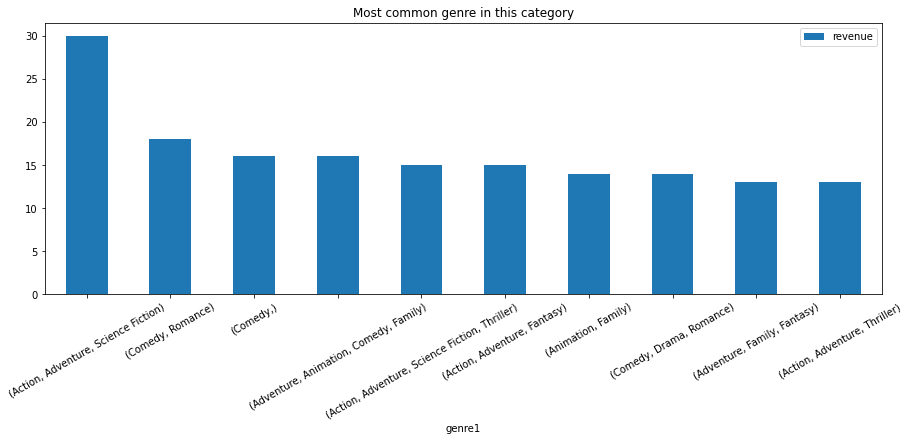

In [ ]:
most_appeared.nlargest(10,'revenue').plot.bar(rot=30,figsize = (15,5), y = 'revenue', title = 'Most common genre in this category')

In [ ]:
top_rev = highest_500_rev.groupby(by='genre1').sum().sort_values('revenue',ascending = False)
top_rev.head(5)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genre1,,,,,,,,,
"(Action, Adventure, Science Fiction)",138.879277,4236350000,19633542696,3957,105216,203.2,60172,4.372714e+09,2.379979e+10
"(Action, Adventure, Fantasy)",71.955425,2854000000,11926066749,2203,57964,101.7,30116,2.945479e+09,1.273681e+10
"(Adventure, Family, Fantasy)",57.846147,2155000000,10119250003,1788,35127,88.6,26083,2.282077e+09,1.090692e+10
"(Adventure, Animation, Comedy, Family)",49.176654,1782000000,8625201181,1529,27242,102.7,32166,1.770547e+09,8.544004e+09
"(Action, Adventure, Fantasy, Science Fiction)",38.489785,1717000000,7979988292,1233,30017,58.7,18065,1.812580e+09,8.491825e+09


<AxesSubplot:title={'center':'All time highest revenue genre'}, xlabel='genre1'>

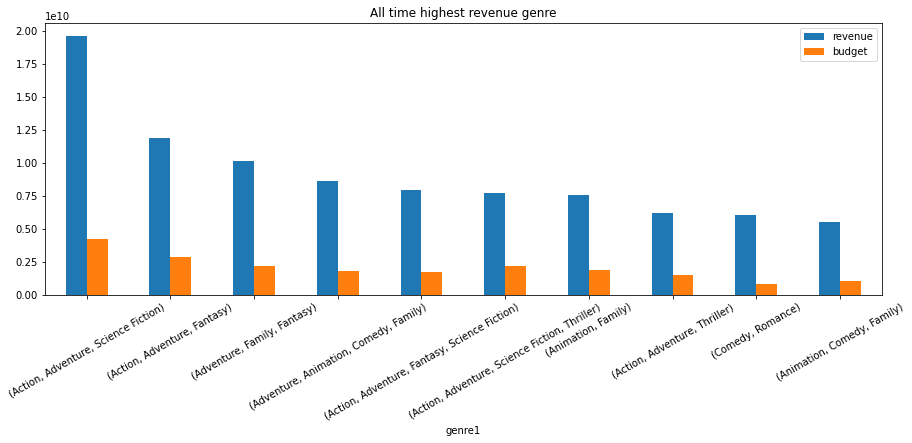

In [ ]:
top_rev.nlargest(10,'revenue').plot.bar(rot=30,figsize = (15,5), y = ['revenue','budget'], title = 'All time highest revenue genre')

The chart above showed (Action, Adventure, Science Fiction) as the all time highest revenue genre but the analysis below is to prove if this genre movies generate high revenue per production or more of quantity. 

In [ ]:
rev_per_movie = highest_500_rev.groupby(by='genre1').mean().sort_values('revenue',ascending = False)
rev_per_movie.head(10)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genre1,,,,,,,,,
"(Drama, Romance, Thriller)",4.355219,2.000000e+08,1.845034e+09,194.000000,4654.000000,7.300000,1997.000000,2.716921e+08,2.506406e+09
"(Action, Crime, Drama, Mystery, Thriller)",1.136610,2.200000e+07,1.106280e+09,114.000000,201.000000,5.600000,1995.000000,3.148127e+07,1.583050e+09
"(Adventure, Family, Fantasy, Mystery)",4.878162,1.500000e+08,9.382127e+08,138.000000,3382.000000,7.200000,2007.000000,1.577503e+08,9.866889e+08
"(Adventure, Science Fiction)",2.204926,6.300000e+07,9.201000e+08,127.000000,3169.000000,7.400000,1993.000000,9.509661e+07,1.388863e+09
"(Action, Adventure, Fantasy, Science Fiction)",4.276643,1.907778e+08,8.866654e+08,137.000000,3335.222222,6.522222,2007.222222,2.013978e+08,9.435361e+08
"(Action, Adventure, Crime)",6.200282,2.450000e+08,8.806746e+08,148.000000,3254.000000,6.200000,2015.000000,2.253999e+08,8.102203e+08
"(Action, Adventure, Mystery, Science Fiction, Thriller)",9.363643,1.600000e+08,8.255000e+08,148.000000,9767.000000,7.900000,2010.000000,1.600000e+08,8.255000e+08
"(Action, Adventure, Fantasy)",4.797028,1.902667e+08,7.950711e+08,146.866667,3864.266667,6.780000,2007.733333,1.963653e+08,8.491206e+08
"(Adventure, Family, Fantasy, Science Fiction)",2.900556,1.050000e+07,7.929106e+08,115.000000,1830.000000,7.200000,1982.000000,2.372625e+07,1.791694e+09


<AxesSubplot:title={'center':'Top revenue/movie genre'}, xlabel='genre1'>

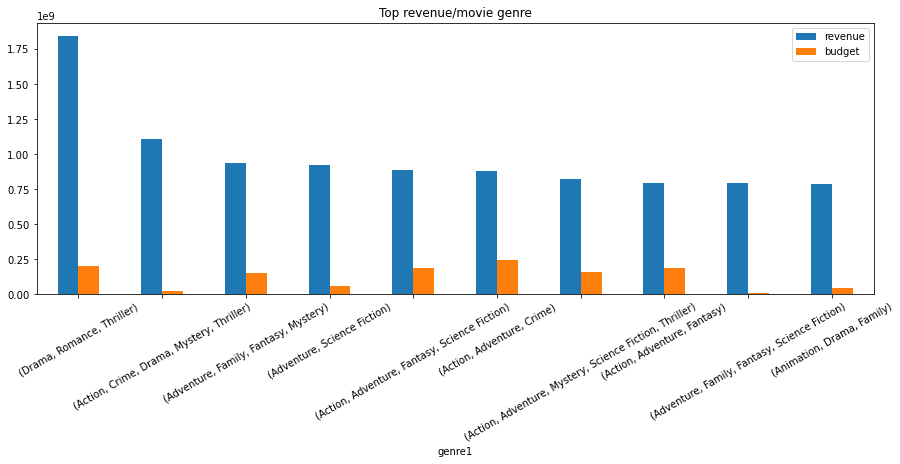

In [ ]:
rev_per_movie.nlargest(10,'revenue').plot.bar(rot=30,figsize = (15,5), y = ['revenue','budget'], title = 'Top revenue/movie genre')

Calculating the mean shows a better insight that (Drama, Romance, Thriller) genre houses more expensive movie than the rest of the genre.

I've visualize the variance of budget and revenue in this expensive movie genre below and we can see how companies make profit producing in this genre (Drama, Romance, Thriller).

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>]], dtype=object)

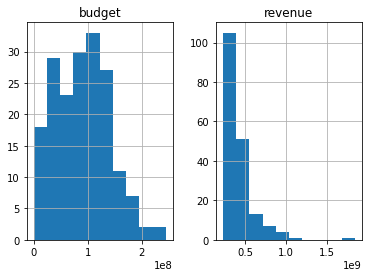

In [ ]:
rev_per_movie[['budget','revenue']].hist()

### Question 2

##### Over the years, which genre is the most popular?

### Outcome

The genre that have the highest popularity figure over the years happens to be (Action, Adventure, Science Fiction, Thriller) in 2015

In [ ]:
mp_oy = df.groupby(by=['release_year','genre1']).sum().sort_values(by = ['popularity'], ascending = False)
mp_oy.head(10)

popularity  \
release_year genre1                                                       
2015         (Action, Adventure, Science Fiction, Thriller)   71.932754   
2014         (Drama,)                                         45.126157   
             (Comedy,)                                        41.062643   
2015         (Drama,)                                         35.477358   
2014         (Action, Adventure, Science Fiction)             32.266014   
2015         (Comedy,)                                        26.630242   
2013         (Comedy,)                                        26.431040   
2015         (Action, Crime, Thriller)                        25.190455   
2014         (Adventure, Drama, Science Fiction)              24.949134   
2011         (Comedy,)                                        24.751245   

                                                                budget  \
release_year genre1                                                      
2015         (Action, Adventure, Science Fiction, Thriller)  465000000   
2014         (Drama,)                                        310000000   
             (Comedy,)                                       367600005   
2015         (Drama,)                                        249170000   
2014         (Action, Adventure, Science Fiction)            550000000   
2015         (Comedy,)                                       405000000   
2013         (Comedy,)                                       567112042   
2015         (Action, Crime, Thriller)                       431900000   
2014         (Adventure, Drama, Science Fiction)             165000000   
2011         (Comedy,)                                       451248389   

                                                                revenue  \
release_year genre1                                                       
2015         (Action, Adventure, Science Fiction, Thriller)  2332568701   
2014         (Drama,)                                         770603449   
             (Comedy,)                                       1428393915   
2015         (Drama,)                                         537532344   
2014         (Action, Adventure, Science Fiction)            1733578971   
2015         (Comedy,)                                       1217293027   
2013         (Comedy,)                                       1524782235   
2015         (Action, Crime, Thriller)                       2120766957   
2014         (Adventure, Drama, Science Fiction)              621752480   
2011         (Comedy,)                                       1210692998   

                                                             runtime  \
release_year genre1                                                    
2015         (Action, Adventure, Science Fiction, Thriller)      465   
2014         (Drama,)                                           7909   
             (Comedy,)                                          4668   
2015         (Drama,)                                           6046   
2014         (Action, Adventure, Science Fiction)                422   
2015         (Comedy,)                                          3426   
2013         (Comedy,)                                          5307   
2015         (Action, Crime, Thriller)                           741   
2014         (Adventure, Drama, Science Fiction)                 169   
2011         (Comedy,)                                          3059   

                                                             vote_count  \
release_year genre1                                                       
2015         (Action, Adventure, Science Fiction, Thriller)       14526   
2014         (Drama,)                                             10929   
             (Comedy,)                                            11095   
2015         (Drama,)                                              6459   
2014         (Action, Adventure, Science Fiction)      

This is a graphical representation of the genre that gather the highest popularity movies and their year respectively

<AxesSubplot:title={'center':'Movies genre with highest popularity over the years'}, xlabel='release_year,genre1'>

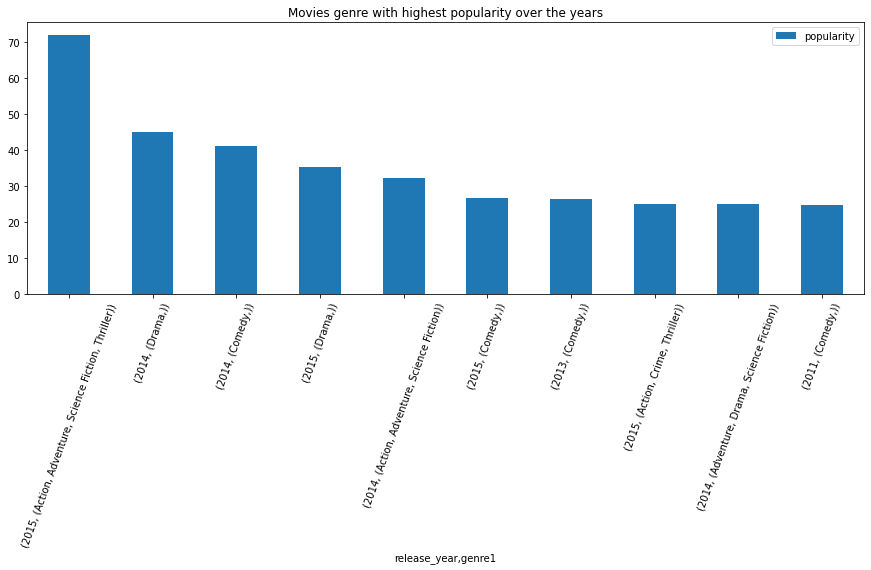

In [ ]:
mp_oy.nlargest(10,'popularity').plot.bar(rot=70,figsize = (15,5), y = ['popularity'], title = 'Movies genre with highest popularity over the years')

### Question 3

##### Which director have the most rated movie and does it have any link with question 2?

### Outcome

Woody Allen and Clint Eastwood are the top 1 & 2 directors that have directed the most movies over the years. Steven Spielberg and Peter Jackson are the directors that have the highest revenue generated movies, Christopher Nolan despite not directing most movies have the most rated (highest popularity) movies while Steven Spielberg and Peter Jackson occupy the second and third position respectively.

In [ ]:
# To find the director that directed the most movies

top_director = df.groupby(by=['director']).count().sort_values(by = ['popularity'], ascending = False)
top_director.head(10)

,imdb_id,popularity,budget,revenue,original_title,cast,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1
director,,,,,,,,,,,,,,,,,
Woody Allen,45,45,45,45,45,45,45,45,45,42,45,45,45,45,45,45,45
Clint Eastwood,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
Martin Scorsese,29,29,29,29,29,28,29,29,29,26,29,29,29,29,29,29,29
Steven Spielberg,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
Ridley Scott,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Ron Howard,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Steven Soderbergh,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Joel Schumacher,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Brian De Palma,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20


In [ ]:
# To find the director that has the highest revenue generated movies over the years

top_director = df.groupby(by=['director']).sum().sort_values(by = ['revenue'], ascending = False)
top_director.head(10)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
director,,,,,,,,,
Steven Spielberg,54.378995,1589950000,9018563772,3900,36735,197.9,57818,2.151770e+09,1.520245e+10
Peter Jackson,49.067904,1326775710,6523244659,1853,31796,91.0,26017,1.375725e+09,7.019848e+09
James Cameron,28.824177,760045786,5841894863,1194,21770,61.6,17934,1.030992e+09,7.327221e+09
Michael Bay,22.254874,1360000000,4917208171,1614,17477,69.6,22052,1.501996e+09,5.460672e+09
Christopher Nolan,61.955206,1005000000,4167548502,1207,41759,74.7,20052,1.014694e+09,4.164262e+09
David Yates,20.815974,775000000,4154295625,661,13834,35.7,10042,7.830252e+08,4.177455e+09
Robert Zemeckis,33.619667,1025700000,3869690869,2010,21532,114.0,33924,1.328678e+09,5.655648e+09
Chris Columbus,31.514525,627000000,3851491668,1685,15169,89.6,27987,7.407345e+08,5.094077e+09
Tim Burton,34.648225,1113060000,3665414624,1830,17319,126.2,37963,1.328826e+09,4.529285e+09


In [ ]:
#Getting the director with high popularity movie over the years

df.groupby(by=['director']).sum().sort_values(by = ['popularity'], ascending = False)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
director,,,,,,,,,
Christopher Nolan,61.955206,1005000000,4167548502,1207,41759,74.7,20052,1.014694e+09,4.164262e+09
Steven Spielberg,54.378995,1589950000,9018563772,3900,36735,197.9,57818,2.151770e+09,1.520245e+10
Peter Jackson,49.067904,1326775710,6523244659,1853,31796,91.0,26017,1.375725e+09,7.019848e+09
Ridley Scott,46.213770,1482900000,3649996480,2985,24801,149.0,45970,1.740157e+09,4.219566e+09
Quentin Tarantino,46.059995,350200000,1526668694,1535,27894,80.9,22031,3.621053e+08,1.679526e+09
...,...,...,...,...,...,...,...,...,...
Nacho G. Velilla,0.001317,0,0,111,13,5.3,2008,0.000000e+00,0.000000e+00
Jean-Xavier de Lestrade,0.001315,0,0,360,12,7.5,2004,0.000000e+00,0.000000e+00
Zana Briski|Ross Kauffman,0.001117,350000,3515061,85,23,6.4,2004,4.040559e+05,4.057946e+06


### Question 4

##### Does high popularity means high revenue?

### Answer

No, data shows having a high popularity movie does not gurantee getting high revenue. (see table below) Jurassic World is the most popular movie in the dataset but it's no where near the top revenue generated movies.

In [ ]:
popular_rev = df.sort_values('popularity', ascending = False)
popular_rev.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1
id,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"(Action, Adventure, Science Fiction, Thriller)"
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,"(Action, Adventure, Science Fiction, Thriller)"
157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08,"(Adventure, Drama, Science Fiction)"
118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08,"(Action, Adventure, Science Fiction)"
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,"(Adventure, Science Fiction, Thriller)"


### Question 5

##### Does high budget gives high popularity and revenue?

### Outcome

Several movies were made at lost over the years and as in the case of The Warrior's Way movie which is the highest budgetted movie in this dataset, This movie alongside some other movies generated a very low revenue and popularity compared to the budget.

Therefore high budget does not guarantee a high popularity or revenue.

In [ ]:
df['lost_test'] = df['budget'] > df['revenue']
df['lost_test'].tail()

id
150093    False
140403    False
96924     False
101449    False
22293      True
Name: lost_test, dtype: bool

In [ ]:
df['lost_test'].unique()

array([False,  True])

In [ ]:
count_lost = df[df['lost_test'] != False]
count_lost.count()


imdb_id                 2386
popularity              2387
budget                  2387
revenue                 2387
original_title          2387
cast                    2378
director                2384
overview                2387
runtime                 2387
genres                  2387
production_companies    2272
release_date            2387
vote_count              2387
vote_average            2387
release_year            2387
budget_adj              2387
revenue_adj             2387
genre1                  2387
lost_test               2387
dtype: int64

In [ ]:
10866 - 2387

8479

In [ ]:
budget_rev = df.sort_values('budget', ascending = False)
budget_rev.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,lost_test
id,,,,,,,,,,,,,,,,,,,
46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,4.250000e+08,1.108757e+07,"(Action, Adventure, Fantasy, Thriller, Western)",True
1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08,"(Action, Adventure, Fantasy)",False
285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,6.8,2007,3.155006e+08,1.010654e+09,"(Action, Adventure, Fantasy)",False
99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09,"(Action, Adventure, Science Fiction)",False
1452,tt0348150,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,"Set 5 years after the end of Superman II, the ...",154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/06,834,5.3,2006,2.920507e+08,4.230205e+08,"(Action, Adventure, Fantasy, Science Fiction)",False


### Question 6

##### Which release year gives the highest return on movie production?

### Outcome

2001 is the year that gives the highest return per movie during this period. 

Limitation: In calculating return, there is a mathematical formular $$ R = ((V1 - V2)/V2)100 $$involved but due to the data not giving more information on cost, i settled to using mean as the criteria for getting returns.

In [ ]:
#net_profit = df['revenue'] - df['budget']
#df['return_percent'] =[net_profit / df['budget']+ 0.01 ] * 100
#check = df['return_percent'] < 0

In [ ]:
return_year = df.groupby(by=['release_year']).mean().sort_values(by = ['revenue'], ascending = False)
return_year.head(10)

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,lost_test
release_year,,,,,,,,,
2001,0.705034,2.341056e+07,5.564350e+07,108.024896,261.601660,5.890871,2.882982e+07,6.852431e+07,0.240664
1997,0.712003,2.474524e+07,5.549569e+07,106.505208,213.463542,5.988542,3.361543e+07,7.538870e+07,0.276042
2002,0.701454,2.216030e+07,5.505120e+07,106.864662,236.481203,5.973308,2.686408e+07,6.673644e+07,0.304511
2004,0.722438,2.335616e+07,5.470301e+07,105.364821,257.980456,5.988599,2.696341e+07,6.315163e+07,0.270358
2003,0.719083,2.220590e+07,5.387275e+07,100.679715,243.505338,5.930961,2.632182e+07,6.385821e+07,0.224199
1995,0.714641,1.647060e+07,5.262265e+07,107.574713,205.551724,6.052299,2.356888e+07,7.530127e+07,0.224138
1999,0.645799,2.573766e+07,5.069515e+07,108.861607,238.602679,6.032589,3.369195e+07,6.636262e+07,0.312500
2000,0.549050,2.545442e+07,4.857832e+07,103.862832,204.380531,5.884513,3.223274e+07,6.151435e+07,0.305310
1992,0.582913,1.084034e+07,4.570040e+07,107.030075,146.218045,6.081203,1.684615e+07,7.101953e+07,0.187970


<AxesSubplot:title={'center':'Growth over the years'}, xlabel='release_year'>

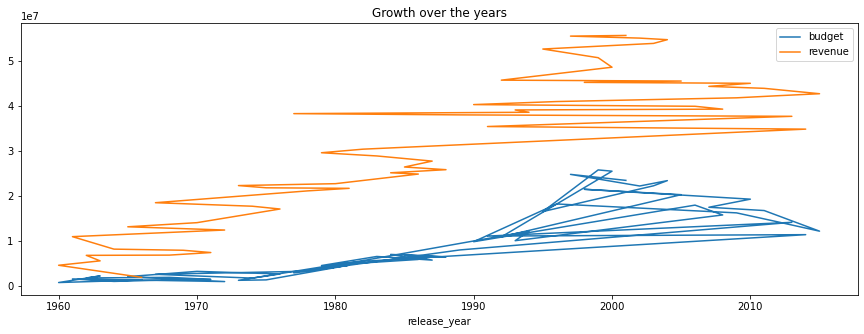

In [ ]:
return_year[['budget','revenue']].plot.line(figsize = (15,5), title = 'Growth over the years')

#### Graphical representation of movies revenue across the years.

The industry have been showing a lot of growth over the years, with this analysis further prediction model can be built observing the trend and forecasting the future growth(A.I).

<AxesSubplot:title={'center':'Movie Annual Revenue'}, xlabel='release_year', ylabel='revenue'>

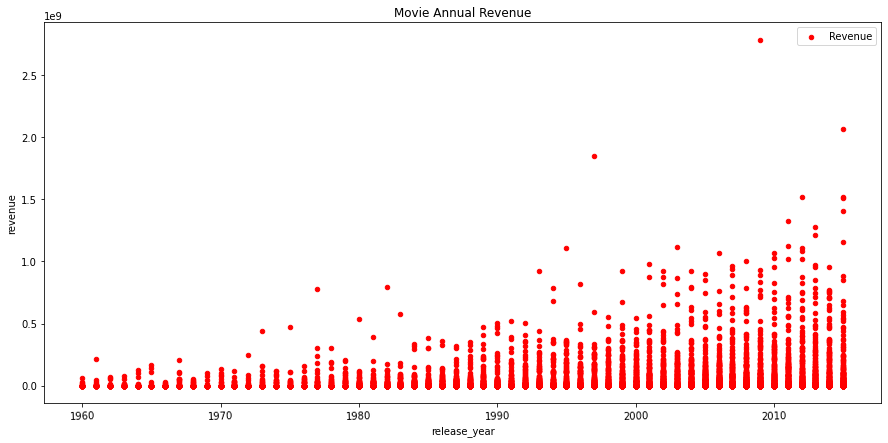

In [ ]:
scat_plt = df[['release_year','revenue']]
scat_plt.plot.scatter(rot=2,figsize = (15,7), x = 'release_year', y = 'revenue', color = 'red', title = 'Movie Annual Revenue', label = 'Revenue')

## Conclusion

Data shows great growth occurring in the movie industry over the years. Several movies close to 1/4 that were produced made a loss, showing high budget does not guarantee high popularity or revenue. Among the whole directors, i would recommend director Steven Spielberg to any one who want to produce high popularity/revenue movie. 2019 produce the all time highest revenue genereated movie.

My analysis proved that you can produce a high revenue gerated movie without breaking the bank, just get the genre right and appoint the best director

Several research can still be done futher on this dataset provided we have more data feature (column) and in the coming years, the industry is showing signs of more growth.

Other angle like the production_company, runtime and correlation of vote with popularity can also be exploit.

In the course of my analysis, i used resources from [StackOverflow multiple_value](https://stackoverflow.com/questions/71688904/dealing-with-multiple-values-in-pandas-dataframe-cell), [stackoveflow Unique_items](https://stackoverflow.com/questions/50418645/unique-items-in-a-pandas-dataframe-with-a-list) and [returns_formular](https://www.google.com/search?q=return+formular&oq=return+formular&aqs=chrome..69i57.7968j0j7&sourceid=chrome&ie=UTF-8)

## Limitations

The data provided has some missing values which makes me to reduce the total dataset i worked with during cleaning. In the genre column, several value were combined which doesn't give us the real result(e.g comedy movie and a comedy movie having some actions and education is regarded as a different genre giving the count of comedy genre).

I could not find the correlation between popularity and vote_average. What are the value behind popularity and how is it calculated? Does the budget means total cost of producing a movie? 

---
Thanks
*Bamidele*
